#### Imports


In [123]:
import pandas as pdb
import inflection
import math
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.core.display import HTML
pd.set_option('display.float_format', lambda x: '%.2f' %x)

#### funcao 

In [119]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()

In [125]:
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


#### loading data

In [42]:
df_sales_raw = pd.read_csv('datas/train.csv', low_memory=False)
df_store_raw = pd.read_csv('datas/store.csv', low_memory=False)
# merge
df_raw = pd.merge(df_sales_raw, df_store_raw, how='left', on='Store')
df_raw

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


### descricao dos dados

In [43]:
df1 = df_raw.copy()

### renomiar colunas

In [44]:
old_columns = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval']
snakecase = lambda x: inflection.underscore(x)
cols_new = list(map(snakecase, old_columns))
df1.columns = cols_new
df1

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [45]:
# dimencao dos dados
df1.shape

(1017209, 18)

### analise do null e tipos de colunas

In [46]:

df1['date'] = pd.to_datetime(df1['date'])

df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

In [47]:
df1['competition_distance'].max()
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

### fillout NA 


In [51]:
# competition_distance 
df1['competition_distance'] = df1['competition_distance'].apply(lambda x: 200000 if
                                                                math.isnan(x) else x)                                                           
                                                       
                                                               
# competition_open_since_month
df1['competition_open_since_month']= df1.apply(lambda x:
                                              x['date'].month if math.isnan(x['competition_open_since_month'])
                                              else x['competition_open_since_month'], axis=1)
# competition_open_since_year 
df1['competition_open_since_year']= df1.apply(lambda x:
                                              x['date'].month if math.isnan(x['competition_open_since_year'])
                                              else x['competition_open_since_year'], axis=1)
# promo2_since_week
df1['promo2_since_week']= df1.apply(lambda x:
                                              x['date'].week if math.isnan(x['promo2_since_week'])
                                              else x['promo2_since_week'], axis=1)
# promo2_since_year
df1['promo2_since_year']= df1.apply(lambda x:
                                              x['date'].year if math.isnan(x['promo2_since_year'])
                                              else x['promo2_since_year'], axis=1)
# promo_interval
month_map = {1:'Jan', 2:'Fev', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Out', 11:'Nov', 12:'Dec'}
df1['promo_interval'].fillna(0, inplace=True)
df1['month_map'] = df1['date'].dt.month.map(month_map)
df1['is_promo'] = df1[['promo_interval', 'month_map']].apply( lambda x: 0 if x['promo_interval']==0  else 1 if x['month_map'] in  x['promo_interval'].split(',') else 0 , axis=1)

In [52]:
df1.isna().sum()

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       0
is_promo                        0
dtype: int64

### tipos de colunas 

In [63]:
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype(int)
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype(int)
df1['promo2_since_week'] = df1['promo2_since_week'].astype(int)
df1['promo2_since_year'] = df1['promo2_since_year'].astype(int)

In [65]:
df1.describe()


,store,day_of_week,sales,customers,open,promo,school_holiday,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,is_promo
count,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00
mean,558.43,4.00,5773.82,633.15,0.83,0.38,0.18,5935.44,6.79,1372.03,0.50,23.62,2012.79,0.14
std,321.91,2.00,3849.93,464.41,0.38,0.49,0.38,12547.65,3.31,932.64,0.50,14.31,1.66,0.35
min,1.00,1.00,0.00,0.00,0.00,0.00,0.00,20.00,1.00,1.00,0.00,1.00,2009.00,0.00
25%,280.00,2.00,3727.00,405.00,1.00,0.00,0.00,710.00,4.00,9.00,0.00,12.00,2012.00,0.00
50%,558.00,4.00,5744.00,609.00,1.00,0.00,0.00,2330.00,7.00,2006.00,1.00,22.00,2013.00,0.00
75%,838.00,6.00,7856.00,837.00,1.00,1.00,0.00,6910.00,10.00,2011.00,1.00,37.00,2014.00,0.00
max,1115.00,7.00,41551.00,7388.00,1.00,1.00,1.00,200000.00,12.00,2015.00,1.00,52.00,2015.00,1.00


### estatisticas descritiva

In [68]:
#atributos
num_atributos = df1.select_dtypes(include=['int64', 'float64'])
cat_atributos = df1.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])


In [95]:
# central - madia e mediana
ct1 = pd.DataFrame(num_atributos.apply(np.mean)).T
ct2 = pd.DataFrame(num_atributos.apply(np.median)).T
ct2
#dispercao std, min , max, range, skew e kurtosis
d1 = pd.DataFrame(num_atributos.apply(np.std)).T
d2 = pd.DataFrame(num_atributos.apply(np.min)).T
d3 = pd.DataFrame(num_atributos.apply(np.max)).T
d4 = pd.DataFrame(num_atributos.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_atributos.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_atributos.apply(lambda x: x.kurtosis())).T
#concatenar
m = pd.concat([d2,d3,d4,ct1,ct2,d1,d5,d6]).T.reset_index()
m.columns=['atributos', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']

In [117]:
m

,atributos,min,max,range,mean,median,std,skew,kurtosis
0,store,1.00,1115.00,1114.00,558.43,558.00,321.91,-0.00,-1.20
1,day_of_week,1.00,7.00,6.00,4.00,4.00,2.00,0.00,-1.25
2,sales,0.00,41551.00,41551.00,5773.82,5744.00,3849.92,0.64,1.78
3,customers,0.00,7388.00,7388.00,633.15,609.00,464.41,1.60,7.09
4,open,0.00,1.00,1.00,0.83,1.00,0.38,-1.76,1.09
5,promo,0.00,1.00,1.00,0.38,0.00,0.49,0.49,-1.76
6,school_holiday,0.00,1.00,1.00,0.18,0.00,0.38,1.68,0.82
7,competition_distance,20.00,200000.00,199980.00,5935.44,2330.00,12547.65,10.24,147.79
8,competition_open_since_month,1.00,12.00,11.00,6.79,7.00,3.31,-0.04,-1.23
9,competition_open_since_year,1.00,2015.00,2014.00,1372.03,2006.00,932.64,-0.78,-1.39


<AxesSubplot:xlabel='competition_distance', ylabel='Count'>

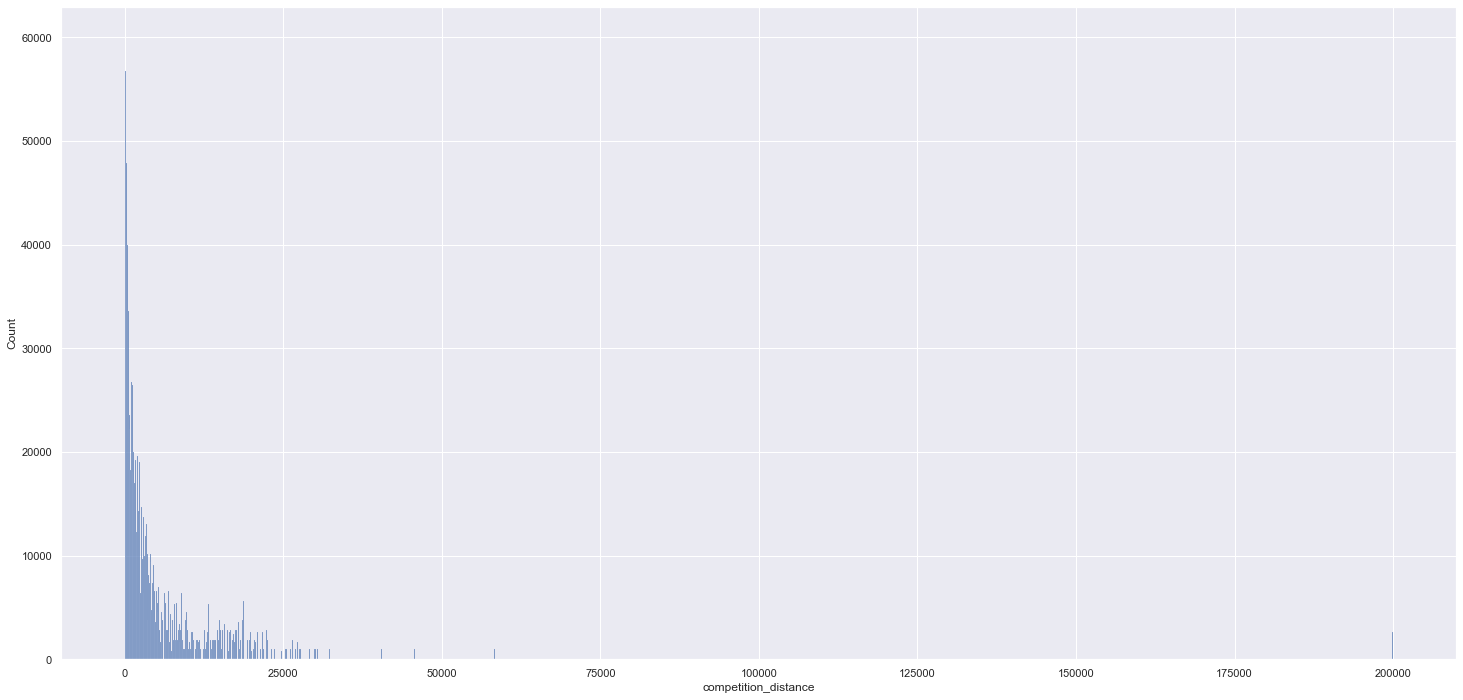

In [127]:
sns.histplot(df1['competition_distance'])

In [111]:
# categoricos atributos
cat_atributos.apply(lambda x: x.unique().shape[0])

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

<AxesSubplot:xlabel='assortment', ylabel='sales'>

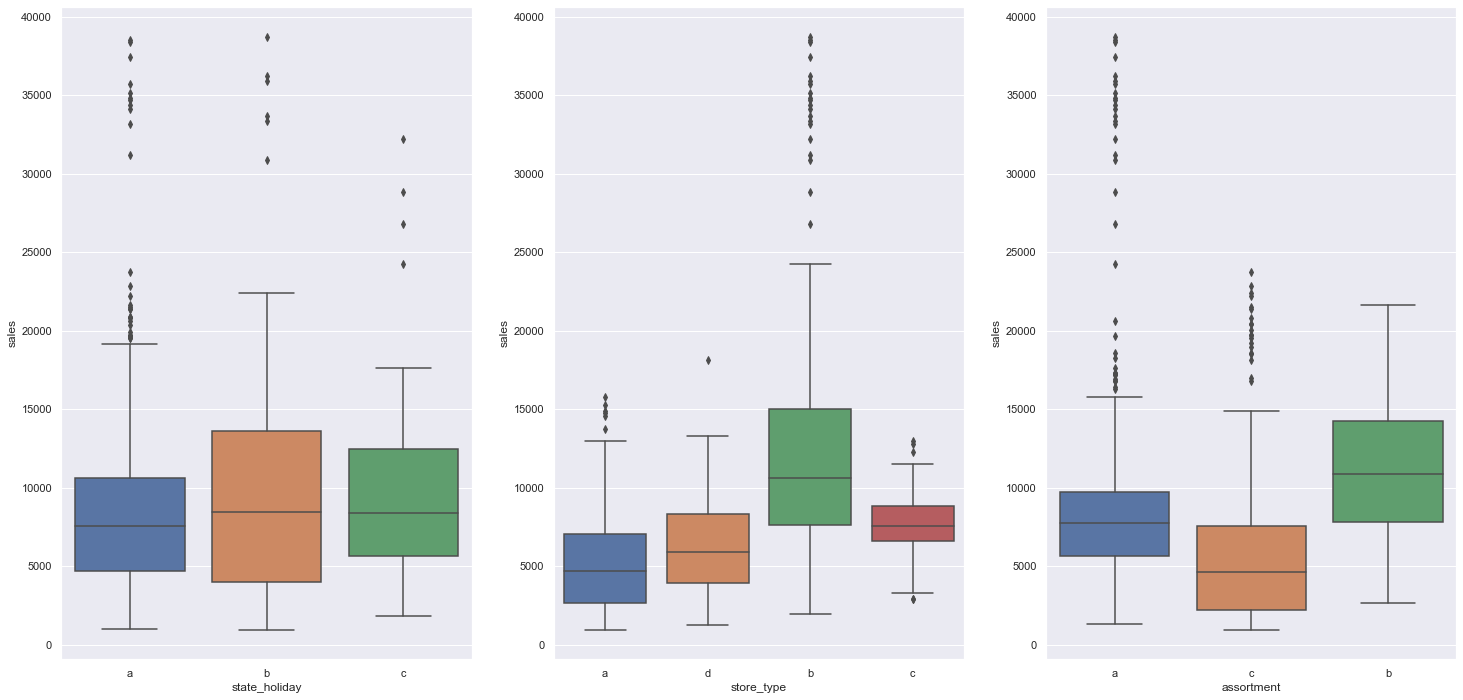

In [122]:
aux1 = df1[(df1['state_holiday']!='0') & (df1['sales']>0)]
plt.subplot(1,3,1)
sns.boxplot(x='state_holiday', y='sales', data=aux1)
plt.subplot(1,3,2)
sns.boxplot(x='store_type', y='sales', data=aux1)
plt.subplot(1,3,3)
sns.boxplot(x='assortment', y='sales', data=aux1)